Capstone Analytic Report and Research Proposal

Section 1:

Prompt: Describe your data set. Describe and explore your data set in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the data set that you will use.

My data comes from a Kaggle User, Dominik Gawlik, who has aggregated raw, as-is daily prices of the NYSE from 2010 to 2016 (dataset can be downloaded at this URL: https://www.kaggle.com/dgawlik/nyse). This report concentrates on the prices of Apple stock (AAPL). The table contains seven columns: Date, Symbol, Open, Close, Low, High, and Volume. Many useful insights can be drawn from the data, such as comparing how AAPL shares performed in comparison to the New York Stock Exchange from 2010 to 2016. To answer this question, we need to generate two subplots and compare them (see below). 

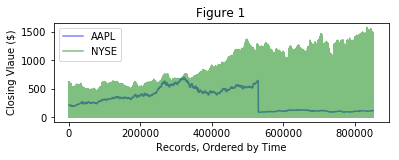

In [4]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a dataframe from the csv file, downloaded from Kaggle
df = pd.read_csv('C:\\Users\\maken\\prices.csv')

# Create a new dataframe from the first df, focusing on the stock symbol for Apple
AAPL = df[df['symbol'] == 'AAPL']
plt.subplot(2, 1, 2)
plt.plot(AAPL['close'], color = 'blue', alpha = .5, label = 'AAPL')
plt.ylabel('Closing Value ($)')

plt.subplot(2, 1, 2)
plt.plot(df['close'], color = 'green', alpha = .5, label = 'NYSE')
plt.ylabel('Closing Vlaue ($)')
plt.legend()

plt.xlabel('Records, Ordered by Time')

plt.title('Figure 1')
plt.show()

Notice that there is a sharp decline in AAPL stock at some set point in time. Let's ivestigate this further.

Section 2: Ask and Answer Analytic Questions

Prompt: Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

Analytic Question 1: When did the sharp drop in AAPL stocks occur, and why?

Could this drop be due to a drop in the NYSE as a whole, some bad press, or could it be due to a stock splitting action?

The first thing to do is look at AAPL data as a whole - at what point in time did this sharp drop occur? By printing the dates that correspond to the values right before and right after the drop, we gain some valuable information to search upon.

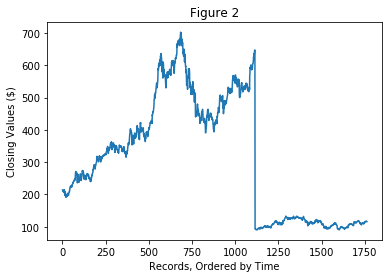

Price dropped from 645.570023 to 93.699997 between 2014-06-06 and 2014-06-09


In [8]:
# Plot the closing values for Apple
fig, ax = plt.subplots()
plt.plot(np.arange(1,1763),AAPL['close'])
plt.title('Figure 2')
plt.ylabel('Closing Values ($)')
plt.xlabel('Records, Ordered by Time')
plt.show()

#Read the first record for the APPL stock.
prev_record = AAPL.ix[AAPL.index[0],:]

#Iterate through rows of the dataframe
for record in AAPL.iterrows():
    #To find 'close' value we first select data component (record[1])
    #and within data we select item that is indexed #3 - 'close'. Hence, record[1][3]
    if record[1][3] < (prev_record[3] - 400):
        print ("Price dropped from {} to {} between {} and {}"
        .format(prev_record[3], record[1][3], prev_record[0],record[1][0]))
        #break after the drop is found
        break
    else:
        #If we haven't found the drop yet, we assign our current data row (record[1]) to the prev_record
        prev_record = record[1]	

The data shows that the drop occurred between Friday, June 6th, and Monday, June 9th. By searching, "What happened to AAPL stock between June 6 and June 9 in 2014," a user will be brought to a CNN Money article (http://money.cnn.com/2014/06/09/investing/apple-stock-split-reactions/). The article states that there was a seven-for-one stock split that went into effect Monday, June 9th, 2014.

A stock split is an action by a company to divide its existing shares into multiple shares, while maintaining its total dollar value (http://www.investopedia.com/terms/s/stocksplit.asp). In AAPL's case, the company took each share, which was valued at  \$645.57, and split it into seven smaller shares, creating a new value of \$93.70/share.

Analytic Question 2: Is there a correlation in the opening price of AAPL stock and the stock price's volatility?

When AAPL opens at a higher price, is the price more likely to have a greater difference (closing price - opening price) at the end of the day? The answer to this question could provide useful insight to AAPL investors and day traders in general. One way to answer this question is to create a scatter plot.

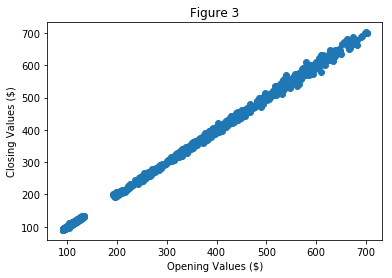

702.100021
90.279999
open      1.356908e+01
close     1.402452e+01
low       1.509117e+01
high      1.207966e+01
volume    3.482290e+07
dtype: float64
open      1.114057e+01
close     1.108476e+01
low       1.104708e+01
high      1.114705e+01
volume    2.077730e+07
dtype: float64


In [18]:
# Make a scatter plot of the closing values for Apple vs the opening values
plt.scatter(x=AAPL['close'],y=AAPL['open'])
plt.ylabel('Closing Values ($)')
plt.xlabel('Opening Values ($)')
plt.title('Figure 3')
plt.show()

# Print the max and min values
print(AAPL['close'].max())
print(AAPL['close'].min())

# Since the highest value is 702, the upper limit range was chosen to be 652 to 702.
# Since the lowest value is 90, the lower limit range was chosen to be 90 to 140.

# Make a measurement of the standard deviations at the higher prices and the lower prices and then compare them
upper = AAPL[AAPL['close'] > 652]
print(upper.std())

lower = AAPL[AAPL['close'] < 140]
print(lower.std())

The points in the scatter plot are distributed in a straight line with a conical shape, where the cone gets wider as the price gets higher. This trend indicates that, as the opening price gets higher, the closing price is more likely to deviate in either direction.

This can be quantified by the standard deviation at the two different ranges. The std of the closing value for the range of \$652 to \$702 is 14.02, and the std of the closing value for the range of \$90 to \$140 is 11.08

Analytic Question 3: At what prices does AAPL most often trade? 

A histogram is a useful tool to answer this question. Histograms provide an estimate of the probability distribution of a dataset. The height of the rectangles are proportional to the relative frequency, and the width of the rectangles on the x-axis represent the price range. 

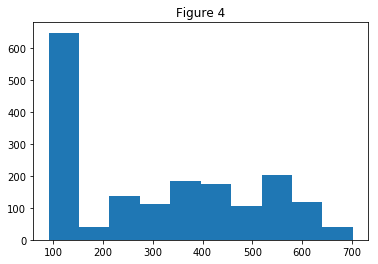

[ 648.   39.  136.  111.  183.  176.  107.  203.  119.   40.]
[  90.279999   151.4620012  212.6440034  273.8260056  335.0080078
  396.19001    457.3720122  518.5540144  579.7360166  640.9180188
  702.100021 ]


In [38]:
# make a histogram of the closing values for Apple
n, bins, patches = plt.hist(x=AAPL['close']) # 
plt.title('Figure 4')
plt.show()
print(n)
print(bins)

By analyzing the histogram, the printed values, and recalling the results from the second chart, it can be determined that the high relative frequency of the \$90 to \$151 range is due to the stock split, since it produced seven times as many shares that could be traded. Outside of this range, it is clear that there was much more volatility in price. 

For the below analysis, the following equation will be used to calculate the percentage of trades:

% of trades = Relative Frequency / Sum of Relative Frequencies

Where the Sum of Relative Frequencies (excluding the \$90 to \$150 range) is equal to 1114

Excluding the \$90 to \$151 range, it can be concluded that AAPL most often traded between \$518 and \$579 with 18.22% of trades (203 / 1114). The next most frequent was the range of \$335 to \$396 with 16.43% of trades (183 / 1114). 


Section 3: Propose further research

Prompt: Lastly, make a proposal for a realistic future research project on this data set that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer. 

Introduction: Random walk and neural networks are used in the industry as approaches to short term stock market prediction. For neural networks, the independent approach provides a way to prevent the accumulation of error percentage versus a joint approach. A genetic algorithm is a method for solving optimization problems based on a natural selection process that mimics biological evolution (https://www.mathworks.com/discovery/genetic-algorithm.html).

Proposal: Utilizing Random Walk and Neural Networks, can we write a program to target potential short term market movers? Conduct an analysis to compare how our model would perform through the data set as well as across industry sectors. 

Techniques:
- Data mining approaches, specifically Python and pandas, to clean the data. 
- Random walk model to determine which stocks have momentum.
- Machine Learning techniques, such as neural networks to improve performance, accuracy, and precision.
- Utilize the full data science toolkit to validate the model on subsets of data via cross-validation of different industry sectors. 